In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
import seaborn as sns
from sklearn.metrics import accuracy_score, adjusted_rand_score, rand_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

Name: Joao Atz Dick

Student ID : 1009786288

https://colab.research.google.com/drive/1JyrJviLxs5N05DWaaIPdd5OTH8mYUcb2?usp=sharing

### 3) Data preparation and visualization

In [ ]:
#change path to your dataset location
df = pd.read_csv('/content/drive/MyDrive/ECE1513/indian_liver_patient.csv').fillna(0)
df.Gender = pd.factorize(df.Gender)[0]
df_norm = (df-df.min())/(df.max()-df.min())


In [ ]:
features = df.drop('Dataset', axis=1)
labels = df['Dataset'].replace({1: 0, 2: 1})

In [ ]:
labels

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Dataset, Length: 583, dtype: int64

In [ ]:
features.corr()

Age    Gender  Total_Bilirubin  \
Age                         1.000000  0.056560         0.011763   
Gender                      0.056560  1.000000         0.089291   
Total_Bilirubin             0.011763  0.089291         1.000000   
Direct_Bilirubin            0.007529  0.100436         0.874618   
Alkaline_Phosphotase        0.080425 -0.027496         0.206669   
Alamine_Aminotransferase   -0.086883  0.082332         0.214065   
Aspartate_Aminotransferase -0.019910  0.080336         0.237831   
Total_Protiens             -0.187461 -0.089121        -0.008099   
Albumin                    -0.265924 -0.093799        -0.222250   
Albumin_and_Globulin_Ratio -0.203418  0.008541        -0.192539   

                            Direct_Bilirubin  Alkaline_Phosphotase  \
Age                                 0.007529              0.080425   
Gender                              0.100436             -0.027496   
Total_Bilirubin                     0.874618              0.206669   
Direct_Bilirubin                    1.000000              0.234939   
Alkaline_Phosphotase                0.234939              1.000000   
Alamine_Aminotransferase            0.233894              0.125680   
Aspartate_Aminotransferase          0.257544              0.167196   
Total_Protiens                     -0.000139             -0.028514   
Albumin                            -0.228531             -0.165453   
Albumin_and_Globulin_Ratio         -0.186023             -0.217864   

                            Alamine_Aminotransferase  \
Age                                        -0.086883   
Gender                                      0.082332   
Total_Bilirubin                             0.214065   
Direct_Bilirubin                            0.233894   
Alkaline_Phosphotase                        0.125680   
Alamine_Aminotransferase                    1.000000   
Aspartate_Aminotransferase                  0.791966   
Total_Protiens                             -0.042518   
Albumin                                    -0.029742   
Albumin_and_Globulin_Ratio                  0.004184   

                            Aspartate_Aminotransferase  Total_Protiens  \
Age                                          -0.019910       -0.187461   
Gender                                        0.080336       -0.089121   
Total_Bilirubin                               0.237831       -0.008099   
Direct_Bilirubin                              0.257544       -0.000139   
Alkaline_Phosphotase                          0.167196       -0.028514   
Alamine_Aminotransferase                      0.791966       -0.042518   
Aspartate_Aminotransferase                    1.000000       -0.025645   
Total_Protiens                               -0.025645        1.000000   
Albumin                                      -0.085290        0.784053   
Albumin_and_Globulin_Ratio                   -0.062993        0.223185   

                             Albumin  Albumin_and_Globulin_Ratio  
Age                        -0.265924                   -0.203418  
Gender                     -0.093799                    0.008541  
Total_Bilirubin            -0.222250                   -0.192539  
Direct_Bilirubin           -0.228531                   -0.186023  
Alkaline_Phosphotase       -0.165453                   -0.217864  
Alamine_Aminotransferase   -0.029742                    0.004184  
Aspartate_Aminotransferase -0.085290                   -0.062993  
Total_Protiens              0.784053                    0.223185  
Albumin                     1.000000                    0.654450  
Albumin_and_Globulin_Ratio  0.654450                    1.000000

In [ ]:
features.corr().abs().min()

Age                           0.007529
Gender                        0.008541
Total_Bilirubin               0.008099
Direct_Bilirubin              0.000139
Alkaline_Phosphotase          0.027496
Alamine_Aminotransferase      0.004184
Aspartate_Aminotransferase    0.019910
Total_Protiens                0.000139
Albumin                       0.029742
Albumin_and_Globulin_Ratio    0.004184
dtype: float64

We can observe that the two most uncorrelated features are `Direct_Bilirubin ` and `Total_Protiens`. There is concentration of points close to  `Direct_Bilirubin` $ = 0$. Nonetheless, two clusters are not visiblely separable, not being aligned to the number of labels.

<Axes: xlabel='Direct_Bilirubin', ylabel='Total_Protiens'>

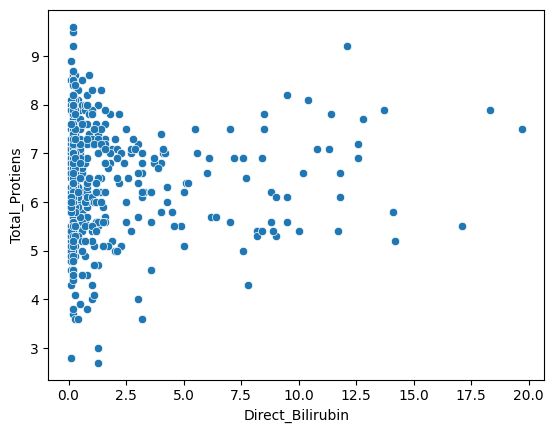

In [ ]:
sns.scatterplot(x = features['Direct_Bilirubin'], y = features['Total_Protiens'])

Plotting with different colors for each actual label further confirms that the clusters are not visibly separable at this specific plot.

<Axes: xlabel='Direct_Bilirubin', ylabel='Total_Protiens'>

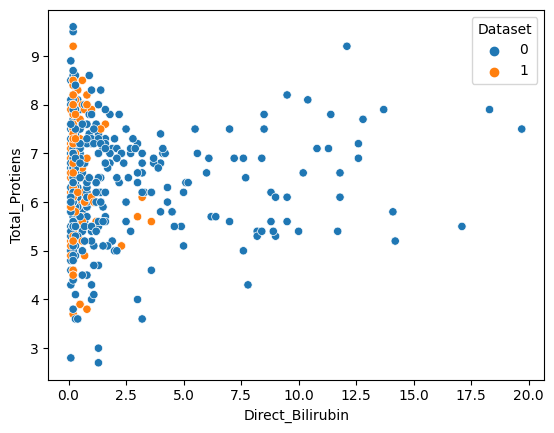

In [ ]:
sns.scatterplot(x = features['Direct_Bilirubin'], y = features['Total_Protiens'], hue =  labels)

### 4) Clustering Methods

####a)

*   **K-means** is an unsupervised learning algorithm. The goal is to separate the data points into K different groups, according to the following steps:

    1. The algorithm is initialized by defining K random cluster centroids
    2. Each data point is assigned to the closest cluster centroid (according to the Euclidean distance)
    3. Each cluster updates its centroid based on the cluster average.
    4. Steps 2 and 3 are repeated until the resulting clusters remain unchanged or the number of epochs is achieved.

    Some disadvantages are: high dependence on initialization, not determining the number of clusters K (it needs to be given as an input and may not always be clear from the start). Some advantages are: the algorithm is of easy implementation, can scale to larger datasets, and generalizes to clusters of different shapes and sizes. Interesting use casesar the ones with a predefined number of clusters, or  where one could intuitively infer that number. Examples are the utilized liver disease dataset (we know the number of calsses) and document classification.





*  **Hierarchical Aglomerative Clustering** is also an usupervised clustering algorithm. The algorithms applies a bottom-up aproach where all data points are initially considered clusters. At each step, two clusters are merged based on their dissimilarity. This generate a new cluster with a higher hierachy. The cluster merging is repeated untill one big cluster is achieved or if a predetermined number of clusters is achieved.

    Some advantages are: The number of clusters K is not necessary to run the algorithm, we can obtaing a tree-based representation giving more insights about the data. One disadvantages is: The algorithms does not scale well to larger datasets. Interesting use cases usually have hierarchical relations within data, such as custumer segmentation or biological data.



#### b)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, init = 'random', n_init = 'auto').fit(features.to_numpy())

In [ ]:
 rand_index = rand_score(labels.to_numpy(), kmeans.labels_)
 acc = accuracy_score(labels.to_numpy(), kmeans.labels_)
 print(f'Rand Index: {rand_index}')
 print(f'Accuracy: {acc}')

Rand Index: 0.5685310604587009
Accuracy: 0.6861063464837049


In [ ]:
HAC = AgglomerativeClustering().fit(features.to_numpy())

In [ ]:
 rand_index = rand_score(labels.to_numpy(), HAC.labels_)
 acc = accuracy_score(labels.to_numpy(), HAC.labels_)
 print(f'Rand Index: {rand_index}')
 print(f'Accuracy: {acc}')

Rand Index: 0.5875934996728617
Accuracy: 0.7101200686106347


The Sklearn models for K-means And HAC achieve the respective accuracies of $0.69$ and $0.71$. The [Rand Index](https://en.wikipedia.org/wiki/Rand_index), a metric utilized for evaluating the similarity between data clusters, is respectively $0.57$ and $0.59$

#### c) Now lets explicitly vary some  hyperparameters, evaluating the Rand Index metric:

In [ ]:
# searching for number of clusters
for i in range(2, 9,2):
  kmeans = KMeans(n_clusters=i, random_state=0, init = 'random', n_init = 'auto').fit(features.to_numpy())
  rand_index_kmeans = rand_score(labels.to_numpy(), kmeans.labels_)
  print(f'K-means Rand Index for K = {i}: {rand_index_kmeans}')
  HAC = AgglomerativeClustering(n_clusters=i).fit(features.to_numpy())
  rand_index_HAC = rand_score(labels.to_numpy(), HAC.labels_)
  print(f'HAC Rand Index for K = {i}: {rand_index_HAC}')

K-means Rand Index for K = 2: 0.5685310604587009
HAC Rand Index for K = 2: 0.5875934996728617
K-means Rand Index for K = 4: 0.5099703512463676
HAC Rand Index for K = 4: 0.5236276399474221
K-means Rand Index for K = 6: 0.4842177857155488
HAC Rand Index for K = 6: 0.4757062946131221
K-means Rand Index for K = 8: 0.44912851526350844
HAC Rand Index for K = 8: 0.47538210347002413


We can observe that, as the number of clusters grows, the Rand Index metric indicates worse performance for both clustering algorithms. This indicates that the optimal number of cluster is $k=2= $ the number of original labels.

After choosing the number of clusters as $K=2$ we can test different hyperparameters:



For K-means we'll test different initialization algorithms (`init`) and K-means algorithms (`algorithms`).

In [ ]:
inits = ['random','k-means++']
algorithms = ['lloyd', 'elkan']
for i in inits:
    for a in algorithms:
        kmeans = KMeans(n_clusters=2, random_state=0, init = i, algorithm = a, n_init = 'auto').fit(features.to_numpy())
        rand_index_kmeans = rand_score(labels.to_numpy(), kmeans.labels_)
        print(f'K-means Rand Index ({i},{a}): {rand_index_kmeans}')

K-means Rand Index (random,lloyd): 0.5685310604587009
K-means Rand Index (random,elkan): 0.5685310604587009
K-means Rand Index (k-means++,lloyd): 0.5875934996728617
K-means Rand Index (k-means++,elkan): 0.5875934996728617


We can observe that the best combination of hyperparameters for Kmeans is with `2` clusters, either the `lloyd` or the `elkan` algorithm, and the `k-means++` initialization.

For K-means we'll test different linkage metrics (`linkage`)

In [ ]:
linkages = ['ward', 'complete', 'average', 'single']

In [ ]:
for l in linkages:
    HAC = AgglomerativeClustering(n_clusters=2, linkage = l).fit(features.to_numpy())
    rand_index_HAC = rand_score(labels.to_numpy(), HAC.labels_)
    print(f'HAC Rand Index ({l}): {rand_index_HAC}')

HAC Rand Index (ward): 0.5875934996728617
HAC Rand Index (complete): 0.5890435182401725
HAC Rand Index (average): 0.5875934996728617
HAC Rand Index (single): 0.5890435182401725


We can observe that the best combination of hyperparameters for HAC is with `2` clusters, and either the `complete` or the `single`linkage metrics.

#### d) As the experiments described, the best number of clusters is equalto the number of original labels. This also indicates there are no subgroups inside the existing clusters.

### 5) Dimensionality Reduction

#### a)

* **PCA** is a dimensionality reduction algorithm.It achieves dimensonality reduction by transforming the original variables into a new set known as principal components. These principal components are linear combinations of the original variables, being orthogonal to each other. They're ordered by the amount of variance they explain in the data, with the first component explaining the maximum variance, the second component explaining the maximum variance left unexplained by the first, and so on.

    Some advantages are: PCA removes multicollinearity, PCA can help to remove noise and the number of needed parameters to train a subsequent ML model, more efficient than TSNE

    Some disadvantages are: does not preserve local structures and may not be good for visualization, PCA is linear not being fit to some nonlinear data relations.
    
    Use cases  examples are: feature extraction and dimensionality reduction



* TSNE measures similarities between pairs of points in both high and low dimensions. First, it calculates the similarity of all high-dimensional points using a Gaussian kernel, favoring closer points over distant ones. Then, it maps high-dimensional data onto a lower-dimensional space while preserving pairwise similarities. This is done by minimizing differences in probability distributions using gradient descent. Finally, TSNE generates clusters of similar points in the lower-dimensional space, offering a visual understanding of the original higher-dimensional data's structure and relationships.

    Some disadvantages are: higher computational complexity than PCA,

    Some advantages are: the ability to preserve local structure, is a nonlinear model, is better for visualization.

    Some use cases are: data visualization, analyze nonlinear data relations







#### b)

In [ ]:
PCA_components = PCA(n_components = 2).fit_transform(features.to_numpy())
TSNE_components = TSNE(n_components = 2).fit_transform(features.to_numpy())

#### c)

<Axes: >

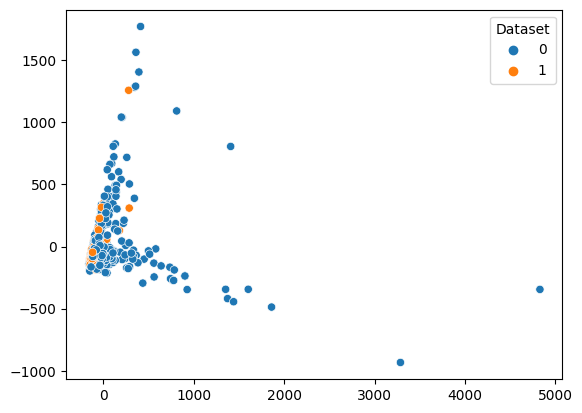

In [ ]:
sns.scatterplot(x = PCA_components[:,0], y = PCA_components[:,1], hue = labels)

<Axes: >

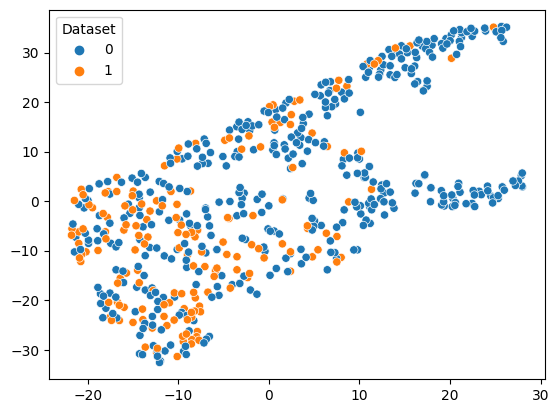

In [ ]:
sns.scatterplot(x = TSNE_components[:,0], y = TSNE_components[:,1], hue = labels)

#### d)
 We can observe that, even though both agorithms are not able to fully separate the data points, the TSNE method provides better visualization. In essence, PCA focuses on retaining data variance, while TSNE emphasizes preserving data point relationships within a lower-dimensional space. This distinction makes tSNE an effective algorithm for visualizing high-dimensional data.